# Perform linear regression and analyse results

Imports

In [1]:
from multiprocessing import Pool
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

Load the dataset

In [2]:
data_path: Path = Path() / ".." / ".." / "ia2" / "01_linear-regression" / "data" / "Advertising.csv"
assert data_path.exists(), "Could not find dataset"

In [3]:
(df := pd.read_csv(data_path, index_col=0))

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Peek at the dataset

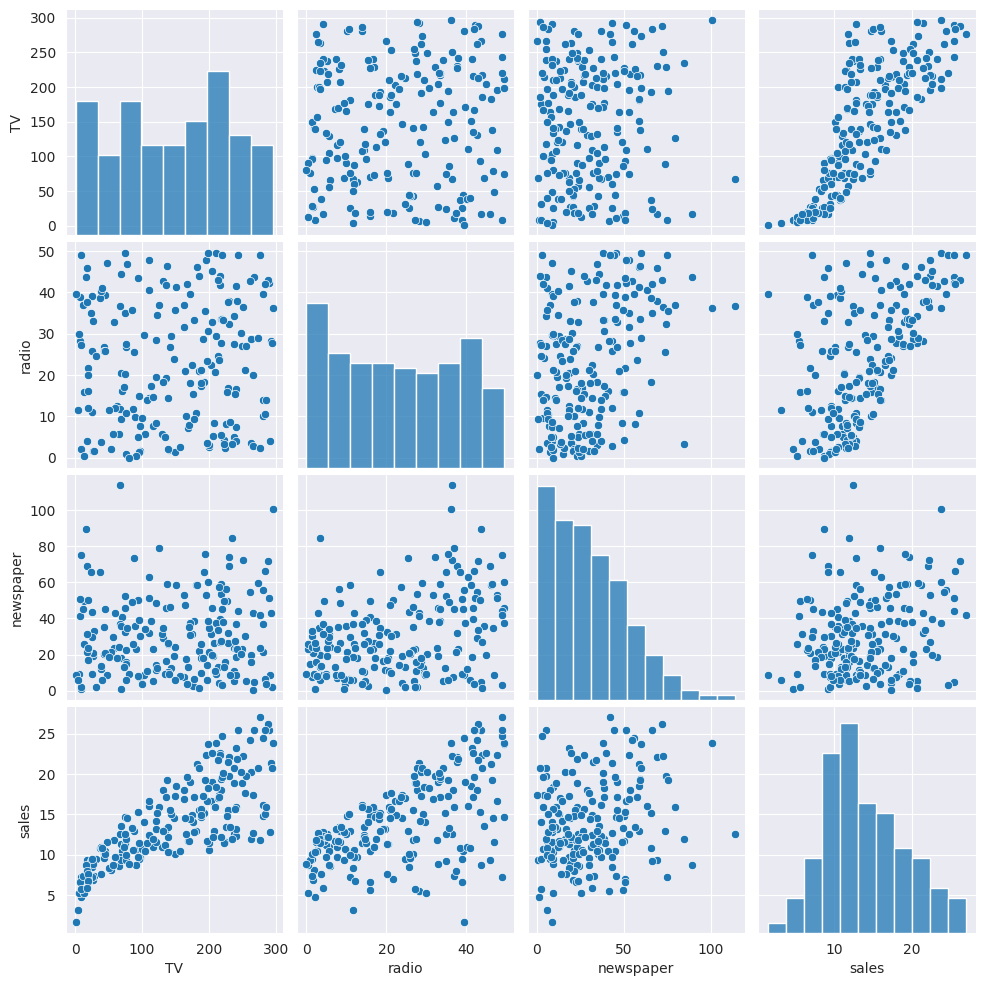

In [4]:
sns.pairplot(df)

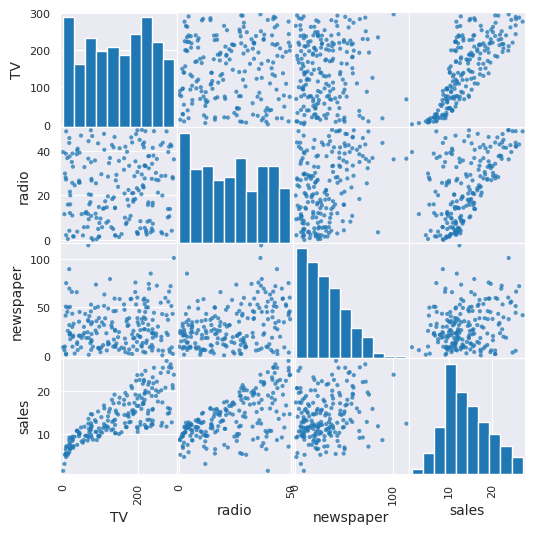

In [5]:
scatter_matrix(df, alpha=0.75, figsize=(6, 6), diagonal='hist')
plt.show()

Define helper functions

In [6]:
XType = list[tuple[float, float, float]]
YType = list[float]


def train(x: XType, y: YType) -> LinearRegression:
    regressor = LinearRegression()
    regressor.fit(X=x, y=y)
    return regressor


def test(regressor: LinearRegression, x: XType, y: YType) -> float:
    return r2_score(regressor.predict(x), y)


def train_and_test(train_x: XType, test_x: XType, train_y: YType, test_y: YType) -> tuple[LinearRegression, float]:
    regressor = train(x=train_x, y=train_y)
    test_result: float = test(regressor, x=test_x, y=test_y)
    return regressor, test_result

def score_only_split_train_and_test(test_size: float) -> tuple[float, float]:
    global full_dataset
    split = train_test_split(*full_dataset, test_size=test_size, random_state=123)
    return test_size, (train_and_test(*split)[1])

Perform train-test split

In [7]:
full_dataset = df[['TV', 'radio', 'newspaper']], df['sales']

Experiment

In [8]:
results: list[tuple[float, float]]
p: Pool
with Pool() as p:
    results = list(tqdm(p.imap(score_only_split_train_and_test, np.linspace(max(0.001, 2.0 / len(df)), min(0.999, 1 - (2.0 / len(df))), 10000)), total=10000))

  0%|          | 0/10000 [00:00<?, ?it/s]

Check performance

In [9]:
results_df = pd.DataFrame(results, columns=["test_size", "score"]).set_index("test_size")

<Axes: xlabel='test_size'>

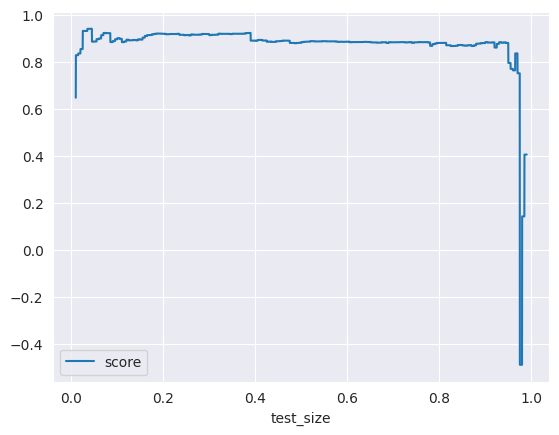

In [10]:
results_df.plot()